<a href="https://colab.research.google.com/github/sileeee/python-data_science_study/blob/master/datascience_week4_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Scikit-learn으로 Random Forest 구현하기

- Data set 구성 계획<br/>
1) 실제 세상의 데이터는 학습 데이터처럼 친절하게 나뉘어져 있지 않다.<br/>
2) 현재 우리는 데이터 보유량이 매우 적다. 우수한 결과를 내기위해서는 훨씬 많은 데이터가 필요하다. 따라서 데이터를 직접 만들거나 더 수집해야 한다. 우리는 Random Forest 사용법을 익히는 중이므로 이 과정을 생략한다.<br/>
3) 따라서 Validation Set은 만들지 않는데  데이터가 너무 적어 효율이 적을 뿐만 아니라 잘못된 시그널을 얻을 수도 있기 때문이다.<br/>
4) 최종적으로 150개 중 75%를 Training set으로 25%를 Test set으로  구성하겠습니다.  8:2 정도로 나누면 된다.<br/>

### Training Set과 Validation Set 나누기

- train_test_split 함수를 이용하여 Training Set과 Validation Set 나누기
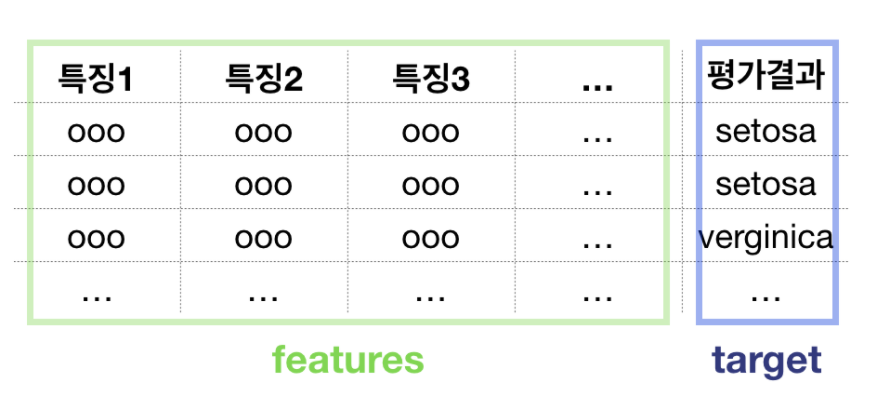

In [ ]:
from sklearn.model_selection import train_test_split

# 훈련을 위한 특징부분과 정답부분 나누기
input_data = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
target_data = df['Species']

# 자동으로 75%, 25%로 나눠줍니다.
x_train, x_test, y_train, y_test = train_test_split(input_data, target_data)

x_train

### Decision Tree 학습 및 평가
- iris 구분 Decision Tree 모델링

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

print('training set accuracy:', tree.score(x_train, y_train))
print('test set accuracy:', tree.score(x_test, y_test))

- Decision Tree 모델로 predict하기

In [ ]:
prediction = tree.predict(x_test)
prediction

### Random Forest 구현해보기
- Scikit-learn의 RandomForestClassifier 사용해보기

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=10)
forest.fit(x_train, y_train)

print('training set accuracy:', forest.score(x_train, y_train))
print('test set accuracy:', forest.score(x_test, y_test))

prediction_by_forest = forest.predict(x_test)
prediction_by_forest

### Multi-class Classification Problem
- Binary classification : 데이터를 2개의 그룹으로 구분하는 분류
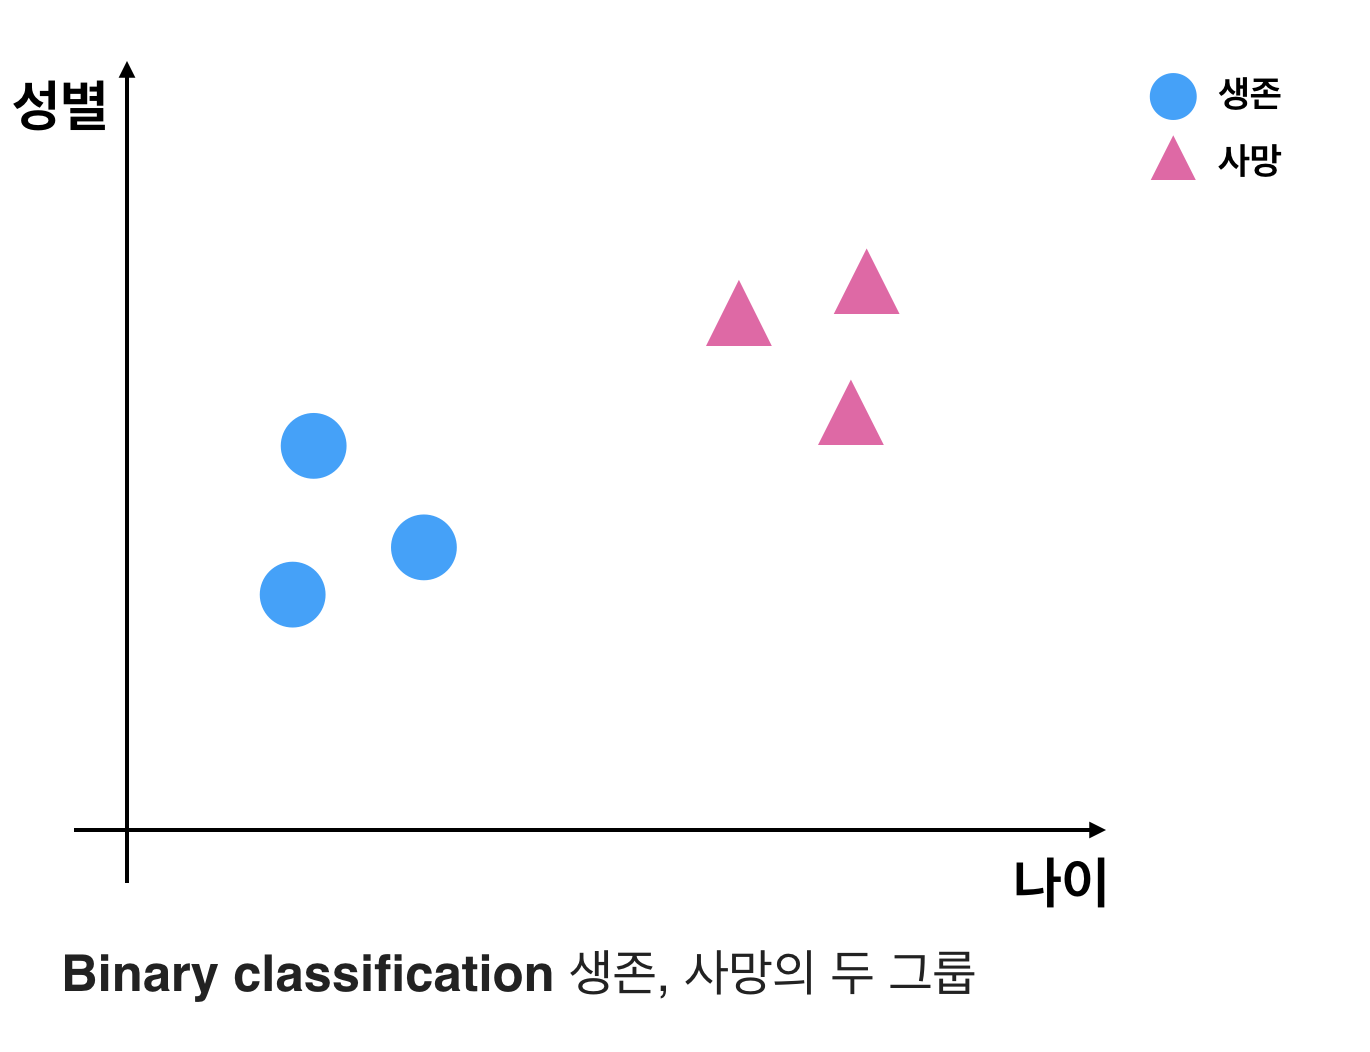
- Multi-class classification : 데이터를 3개 이상의 그룹으로 구분하는 분류​
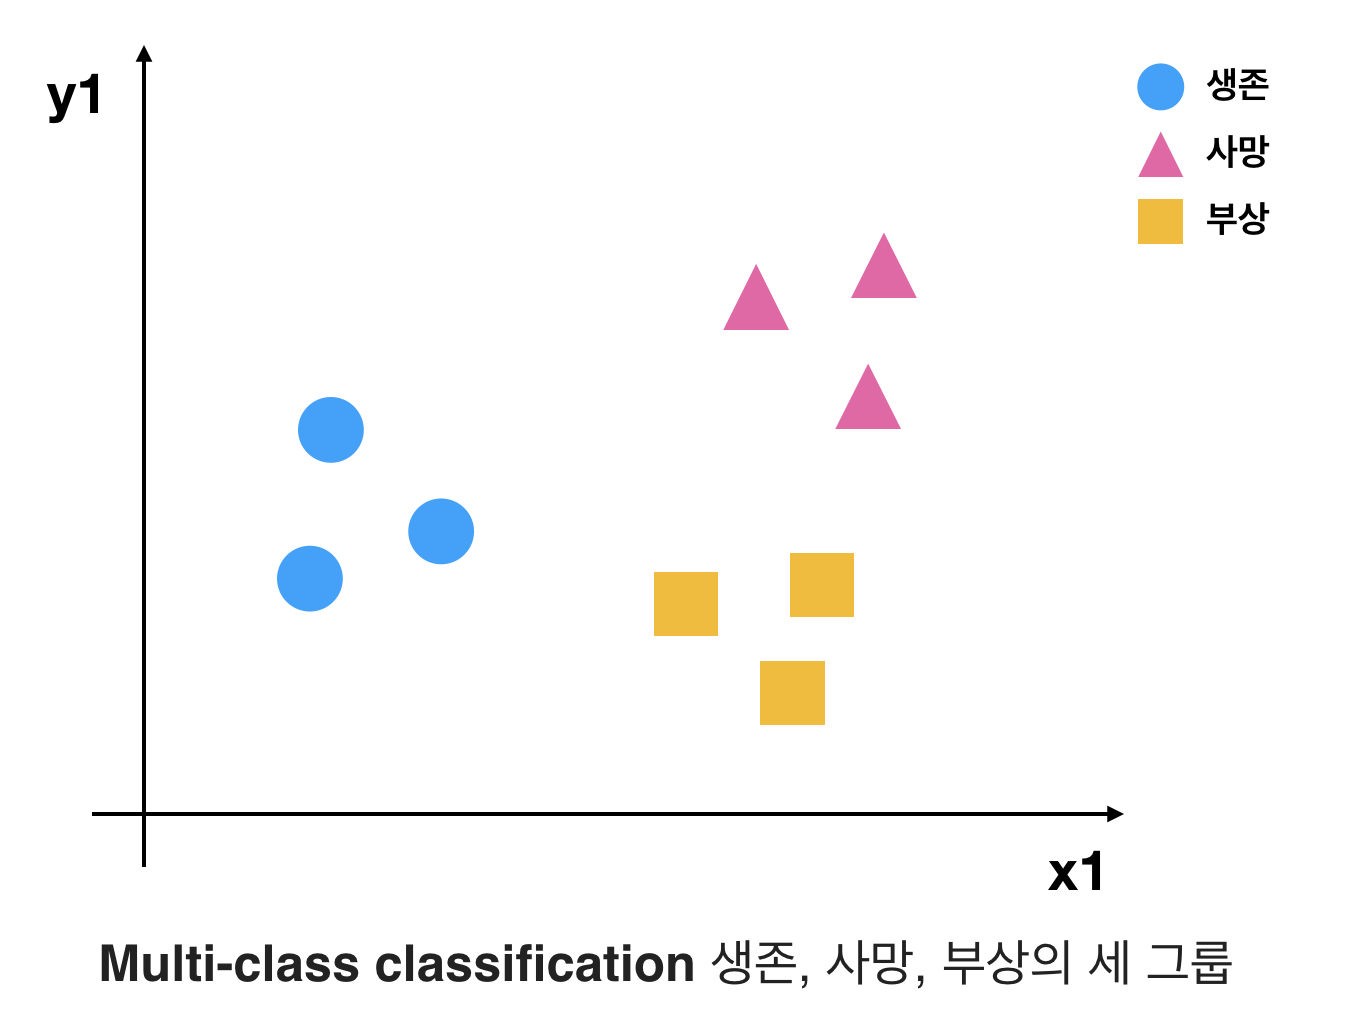
- Decision Tree의 성격
: Decision Tree는 굉장히 강력한 classification 모델이다. 다만 심각하게 overfitting되는 경향이 있다.



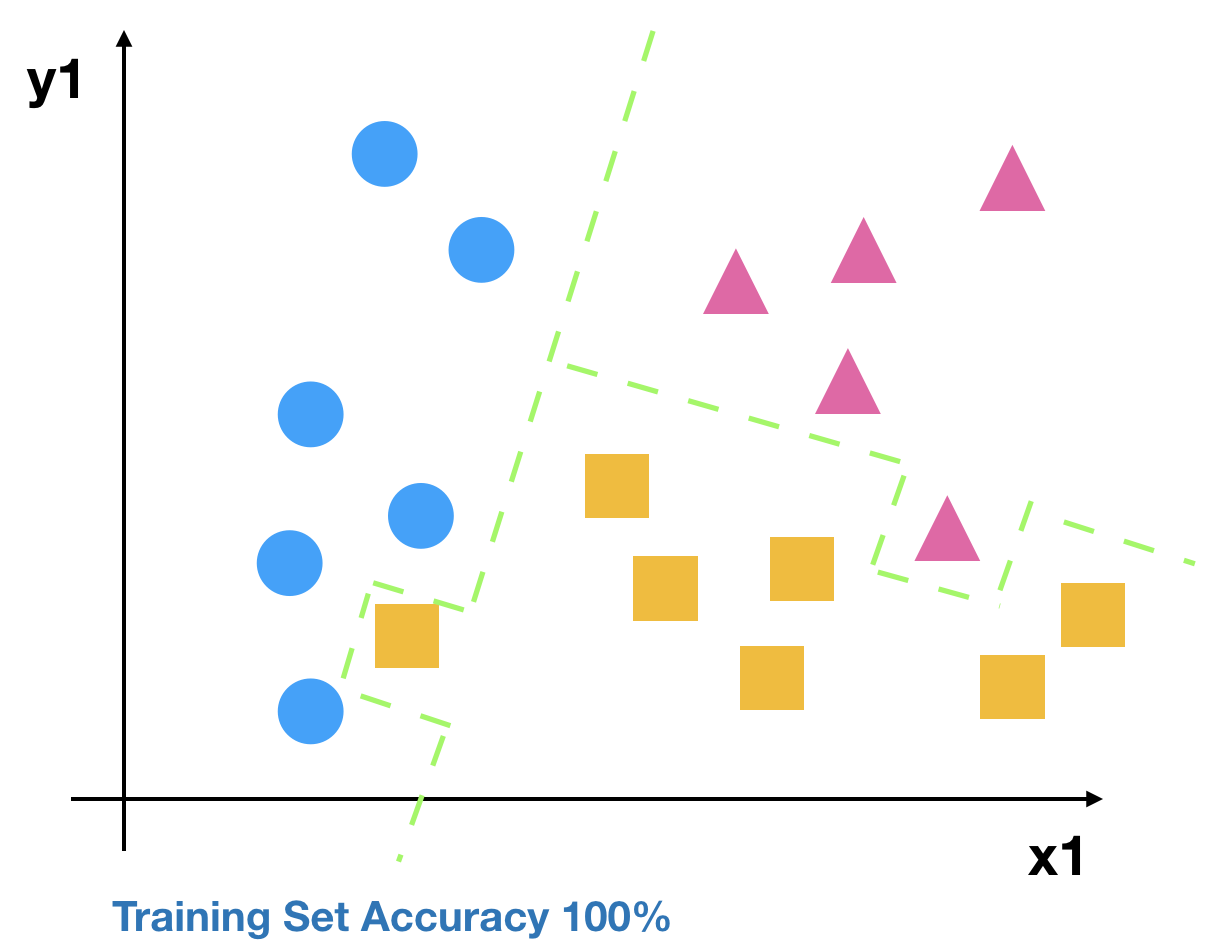

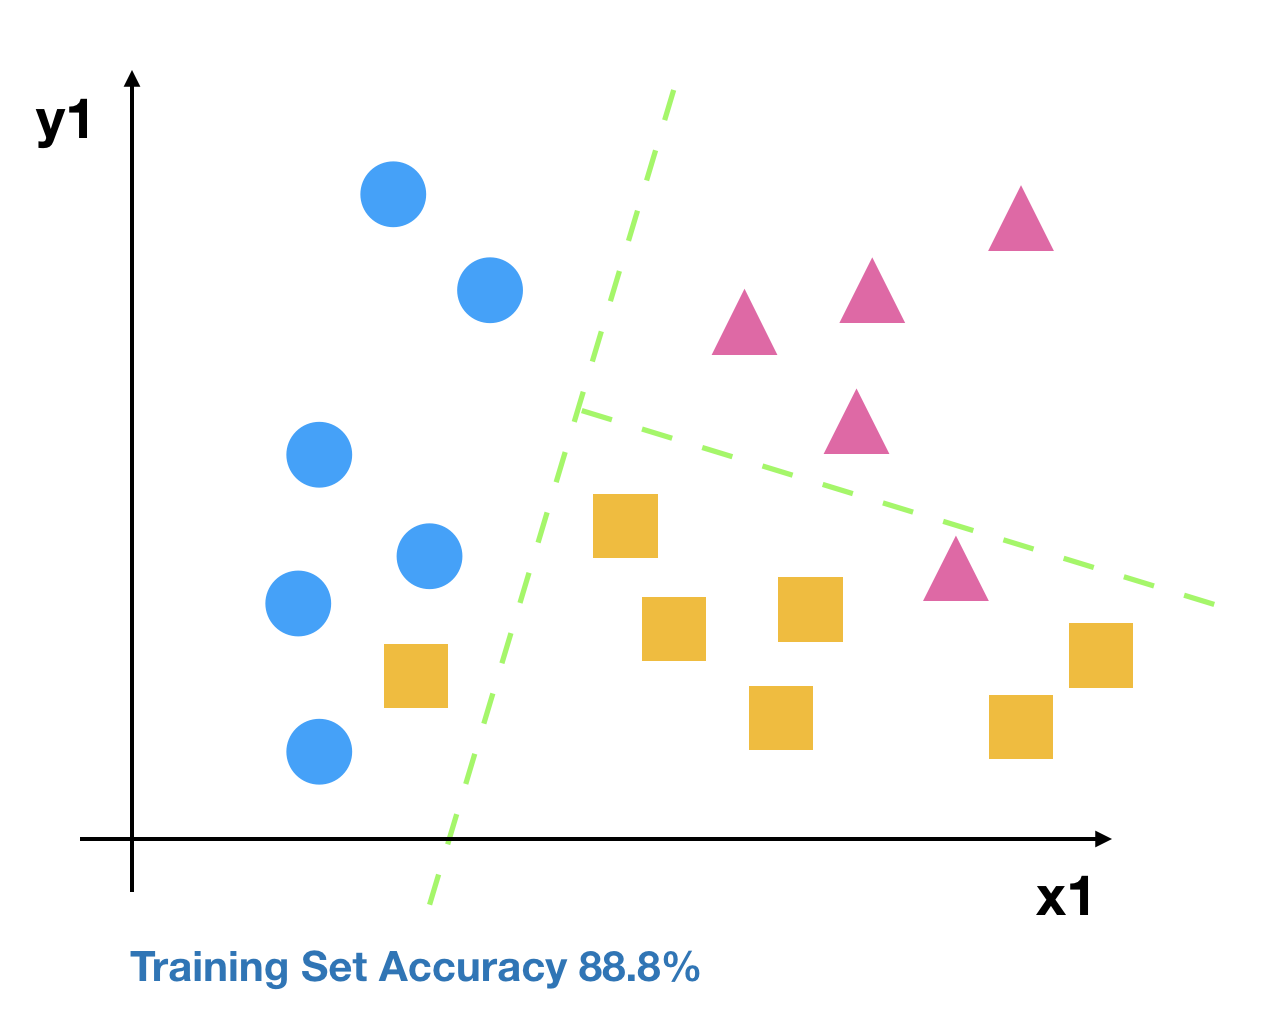

- 너무 과하게 트레이닝되어 실전에서 오히려 잘못된 예측을 남발하는 전자의 모델보다는 훈련 정확도가 88.8%인 모델이 나을 거라고 예상한다.

### Decision Tree의 overfitting 원인과 해결법
- 모든 데이터를 구분하는 지나치게 깊은 트리를 만드는게 overfitting의 원인
- 너무 깊고 자세한 트리가 만들어지면 아래와 같은 지나칠 정도 구분을 하게 된다.


1) max_depth 설정하기
2) random forest 사용하기
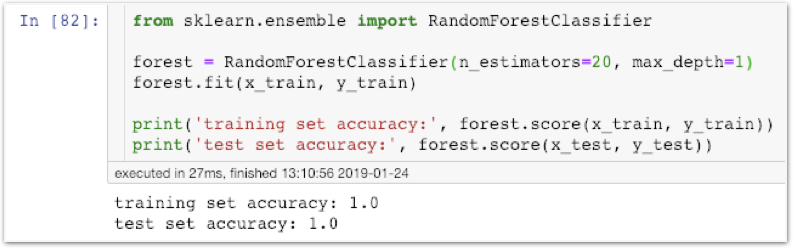

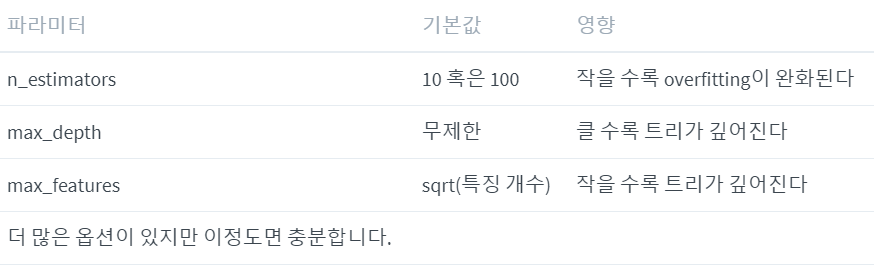

n_estimators는 클수록 좋다. 다만 클수록 학습이 느려지고 모델이 비대해지며 더 많은 컴퓨팅 자원을 필요로 한다. 시간 등 비용의 문제가 없는 선, 더이상 성능의 향상이 없는 선까지 최대한 크게 잡으면 된다.
max_depth의 경우 직접 수를 넣어보며 경험적으로 설정하면 된다. max_feature의 경우 이미 적정값이 설정되어 있다. 특별히 최적화할 것이 아니라면 수정할 필요 없다.
